**Import libraries**

In [1]:
import numpy as np
from math import cos, pi
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**The first mode**

In [2]:
# Generate data
X = np.arange(-10, 10, 0.2)
Y = 2*np.cos(X)/(-np.pi) + (2*X)/(2*np.pi) + 2*np.cos(3*X)/(-3*np.pi)
noise = np.random.randn(len(X)) * 0.1
Y_noisy = Y + noise

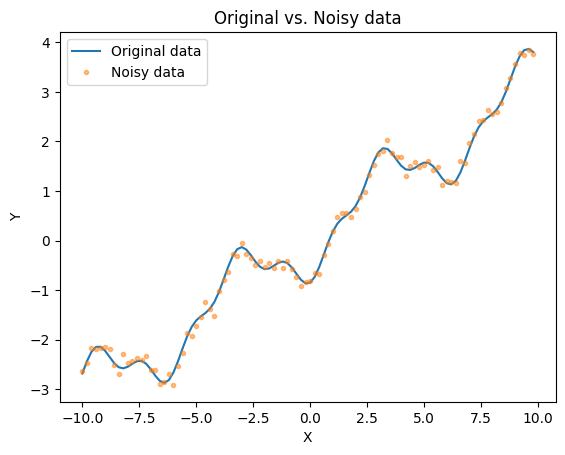

In [3]:
# Plot X, Y, and Y_noisy
fig, ax = plt.subplots()
ax.plot(X, Y, label='Original data')
ax.plot(X, Y_noisy, '.', alpha=0.5, label='Noisy data')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original vs. Noisy data')
plt.show()

In [4]:
# Fit polynomial regression models of degrees 1 to 15
degrees = range(1, 16)
train_mses = []

for degree in degrees:
    # Fit polynomial regression model
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, Y_noisy)
    
    # Evaluate on training data
    y_train_pred = model.predict(X_poly)
    train_mse = mean_squared_error(Y, y_train_pred)
    train_mses.append(train_mse)

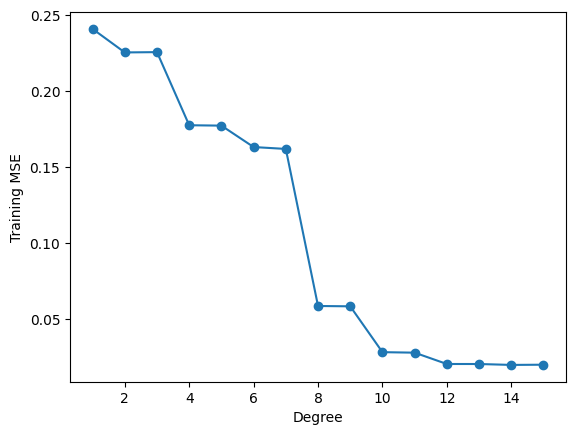

In [5]:
# Plot training MSE vs. model degree
plt.plot(degrees, train_mses, '-o')
plt.xlabel('Degree')
plt.ylabel('Training MSE')
plt.show()

In [6]:
train_mses

[0.24094146713216863,
 0.22548730186203966,
 0.2256829720441145,
 0.17761945868109347,
 0.17736706482625528,
 0.1632835939099453,
 0.16204838156711862,
 0.05879331628130377,
 0.05857517694947249,
 0.028440081934079812,
 0.028107727497808793,
 0.02065735120258373,
 0.02065001246347317,
 0.020050182962398896,
 0.020196263815617947]

In [7]:
# Define function for plotting the fitted line on the original data
def plot_fitted_line(degree, X, Y, color):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, Y)
    x_plot = np.linspace(-10, 10, 200)
    X_plot_poly = poly_features.transform(x_plot.reshape(-1, 1))
    y_plot = model.predict(X_plot_poly)
    plt.plot(x_plot, y_plot, color=color, label=f"Degree {degree} fit")

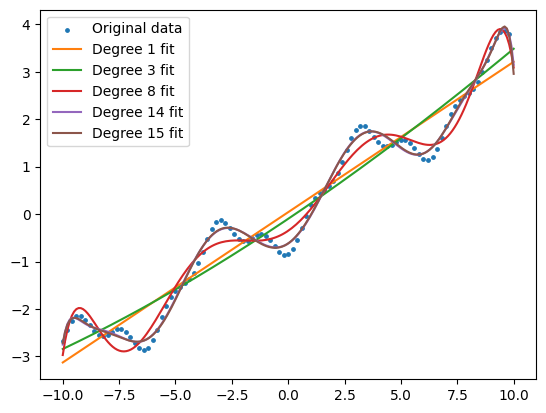

In [8]:
# Plot original data
plt.scatter(X, Y, s=6, label='Original data')

# Plot fitted lines of degree 1, 3, 8, 14 and 15
plot_fitted_line(1, X, Y, 'C1')
plot_fitted_line(3, X, Y, 'C2')
plot_fitted_line(8, X, Y, 'C3')
plot_fitted_line(14, X, Y, 'C4')
plot_fitted_line(15, X, Y, 'C5')

plt.legend()
plt.show()

In [9]:
# Estimate bias and variance of best and worst models
best_degree = 14
worst_degree = 1

# Fit best and worst models
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
best_model = LinearRegression()
best_model.fit(X_poly, Y_noisy)

poly_features = PolynomialFeatures(degree=worst_degree, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
worst_model = LinearRegression()
worst_model.fit(X_poly, Y_noisy)

LinearRegression()

In [10]:
# Calculate bias and variance for best model
y_true = Y
y_preds = []
for i in range(100):
    # Generate new noisy data
    noise = np.random.randn(len(X)) * 0.1
    y_noisy = Y + noise

    # Fit model and make predictions
    poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)
best_bias = np.mean((y_true - np.mean(y_preds, axis=0))**2)
best_var = np.mean(np.var(y_preds, axis=0))
best_mse = best_bias + best_var + 0.1**2
print(f'Best model: Bias = {best_bias:.4f}, Variance = {best_var:.4f}')

# Calculate bias and variance for worst model
y_preds = []
for i in range(100):
    # Generate new noisy data
    noise = np.random.randn(len(X)) * 0.1
    y_noisy = Y + noise

    # Fit model and make predictions
    poly_features = PolynomialFeatures(degree=worst_degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)
worst_bias = np.mean((y_true - np.mean(y_preds, axis=0))**2)
worst_var = np.mean(np.var(y_preds, axis=0))
worst_mse = worst_bias + worst_var + 0.1**2
print(f'Worst model: Bias = {worst_bias:.4f}, Variance = {worst_var:.4f}')


Best model: Bias = 0.0188, Variance = 0.0015
Worst model: Bias = 0.2409, Variance = 0.0002


**the second Mode**

In [11]:
# Add Poisson noise to Y
lam = np.maximum(np.exp(-Y/10), 1e-8)
Y_noisy = np.random.poisson(lam=lam*2, size=Y.shape)
Y_noisy = Y + 0.1 * (Y_noisy - Y)

Text(0.5, 1.0, 'Data with Poisson Noise')

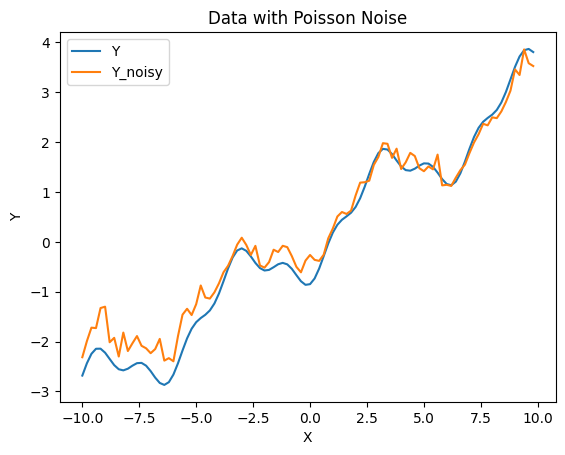

In [12]:
# Plot data
fig, ax = plt.subplots()
ax.plot(X, Y, label='Y')
ax.plot(X, Y_noisy, label='Y_noisy')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Data with Poisson Noise')

In [13]:
# Fit polynomial regression models of degrees 1 to 15
degrees = range(1, 16)
train_mses = []

for degree in degrees:
    # Fit polynomial regression model
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, Y_noisy)
    
    # Evaluate on training data
    y_train_pred = model.predict(X_poly)
    train_mse = mean_squared_error(Y, y_train_pred)
    train_mses.append(train_mse)

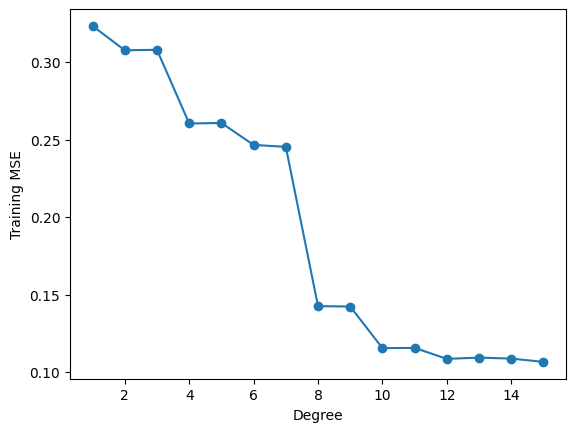

In [14]:
# Plot training MSE vs. model degree
plt.plot(degrees, train_mses, '-o')
plt.xlabel('Degree')
plt.ylabel('Training MSE')
plt.show()

In [15]:
train_mses

[0.3233210164952722,
 0.3076027083510651,
 0.3079054510485156,
 0.26035798291645007,
 0.2606997589317259,
 0.24652698677650825,
 0.2452908514090677,
 0.1424692844261482,
 0.14225851937974926,
 0.11538570286398185,
 0.11554755629298429,
 0.10847996049002254,
 0.10927131819627477,
 0.10866252959300944,
 0.10649986470412624]

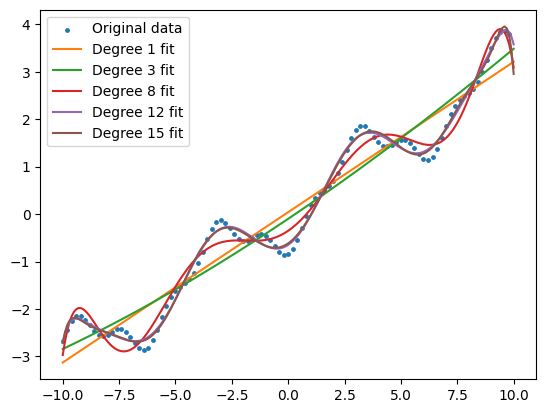

In [16]:
# Plot original data
plt.scatter(X, Y, s=6, label='Original data')

# Plot fitted lines of degree 1, 3, 8, 12 and 15
plot_fitted_line(1, X, Y, 'C1')
plot_fitted_line(3, X, Y, 'C2')
plot_fitted_line(8, X, Y, 'C3')
plot_fitted_line(12, X, Y, 'C4')
plot_fitted_line(15, X, Y, 'C5')

plt.legend()
plt.show()

In [17]:
# Estimate bias and variance of best and worst models
best_degree = 12
worst_degree = 1

# Fit best and worst models
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
best_model = LinearRegression()
best_model.fit(X_poly, Y_noisy)

poly_features = PolynomialFeatures(degree=worst_degree, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
worst_model = LinearRegression()
worst_model.fit(X_poly, Y_noisy)

LinearRegression()

In [18]:
# Calculate bias and variance for best model
y_true = Y
y_preds = []
for i in range(100):
    # Generate new noisy data
    noise = np.random.randn(len(X)) * 0.1
    y_noisy = Y + noise

    # Fit model and make predictions
    poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)
best_bias = np.mean((y_true - np.mean(y_preds, axis=0))**2)
best_var = np.mean(np.var(y_preds, axis=0))
best_mse = best_bias + best_var + 0.1**2
print(f'Best model: Bias = {best_bias:.4f}, Variance = {best_var:.4f}')

# Calculate bias and variance for worst model
y_preds = []
for i in range(100):
    # Generate new noisy data
    noise = np.random.poisson(lam=2, size=len(Y))
    Y_noisy = Y + 0.1 * noise
    # Fit model and make predictions
    poly_features = PolynomialFeatures(degree=worst_degree, include_bias=False)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)
worst_bias = np.mean((y_true - np.mean(y_preds, axis=0))**2)
worst_var = np.mean(np.var(y_preds, axis=0))
worst_mse = worst_bias + worst_var + 0.1**2
print(f'Worst model: Bias = {worst_bias:.4f}, Variance = {worst_var:.4f}')


Best model: Bias = 0.0195, Variance = 0.0013
Worst model: Bias = 0.2412, Variance = 0.0000
